In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from prettytable import PrettyTable
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from itertools import combinations
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Датасет: Wine Quality

In [2]:
df=pd.read_csv("WineQT.csv")

Вывести в табличной форме статистику по датасету, включая
- Размерность всего датасета
- Количество признаков
- Количество целевых классов и объектов в каждом из классов
- Процент объектов с неопределенными признаками

Статистика по изначальному датасету

In [3]:
missing_percent = df.isnull().mean() * 100

th = ["Параметр", "Значение"]
td = [
    ["Размерность всего датасета", df.shape[0]],
    ["", ""],
    ["Количество признаков", df.shape[1]],
    ["", ""], 
    ["Количество целевых классов", len(df["quality"].unique())]
]

# Добавление количества объектов и общего процента пропусков в каждом классе
for quality in (sorted(df["quality"].unique())):
    class_df = df[df["quality"] == quality]
    class_missing_percent = class_df.isnull().mean().mean() * 100  # Средний процент пропусков по всем столбцам
    td.append(["", ""])
    td.append([f"Объекты в классе {quality}", len(class_df)])
    td.append([f"Процент пропусков в классе {quality}", f"{class_missing_percent:.2f}%"])


table = PrettyTable(th)

for row in td:
    table.add_row(row)

print(table)

+------------------------------+----------+
|           Параметр           | Значение |
+------------------------------+----------+
|  Размерность всего датасета  |   1143   |
|                              |          |
|     Количество признаков     |    13    |
|                              |          |
|  Количество целевых классов  |    6     |
|                              |          |
|      Объекты в классе 3      |    6     |
| Процент пропусков в классе 3 |  0.00%   |
|                              |          |
|      Объекты в классе 4      |    33    |
| Процент пропусков в классе 4 |  0.00%   |
|                              |          |
|      Объекты в классе 5      |   483    |
| Процент пропусков в классе 5 |  0.00%   |
|                              |          |
|      Объекты в классе 6      |   462    |
| Процент пропусков в классе 6 |  0.00%   |
|                              |          |
|      Объекты в классе 7      |   143    |
| Процент пропусков в классе 7 |

Отбор признаков по наиболее коррелируемым с целевой переменной

In [4]:
correlation = df.corr()['quality']
print(correlation)
print()
sorted_correlation = correlation.abs().sort_values(ascending=False)
print(sorted_correlation)

fixed acidity           0.121970
volatile acidity       -0.407394
citric acid             0.240821
residual sugar          0.022002
chlorides              -0.124085
free sulfur dioxide    -0.063260
total sulfur dioxide   -0.183339
density                -0.175208
pH                     -0.052453
sulphates               0.257710
alcohol                 0.484866
quality                 1.000000
Id                      0.069708
Name: quality, dtype: float64

quality                 1.000000
alcohol                 0.484866
volatile acidity        0.407394
sulphates               0.257710
citric acid             0.240821
total sulfur dioxide    0.183339
density                 0.175208
chlorides               0.124085
fixed acidity           0.121970
Id                      0.069708
free sulfur dioxide     0.063260
pH                      0.052453
residual sugar          0.022002
Name: quality, dtype: float64


Отбор целевых классов и признаков

In [5]:
df_goal = df["quality"]

df_s = df.filter(items=["alcohol", "volatile acidity", "sulphates", "citric acid", "quality"])
df_s = df_s[(df_s['quality'] == 5) | (df_s['quality'] == 6) | (df_s['quality'] == 7)]

x = df_s.drop(["quality"], axis=1)
scaler = StandardScaler()
x_normalized = scaler.fit_transform(x)

x = pd.DataFrame(x_normalized, columns=x.columns)

y = df_goal[(df_goal == 5) | (df_goal == 6) | (df_goal == 7)]

Статистика по отфильтрованному датасету и выбранные признаки

In [6]:
th = ["Параметр", "Значение"]
td = [
    ["Размерность всего датасета", x.shape[0]],
    ["", ""],  # Пустая строка
    ["Количество признаков", x.shape[1]],
    ["", ""],  # Пустая строка
    ["Количество целевых классов", len(y.unique())]
]

# Добавление количества объектов и общего процента пропусков в каждом классе
for quality in sorted(y.unique()):
    class_df = y[y == quality]
    class_missing_percent = class_df.isnull().mean().mean() * 100  # Средний процент пропусков по всем столбцам
    td.append(["", ""])  # Пустая строка
    td.append([f"Объекты в классе {quality}", len(class_df)])
    td.append([f"Процент пропусков в классе {quality}", f"{class_missing_percent:.2f}%"])

# Создаем и заполняем таблицу
table = PrettyTable(th)
for row in td:
    table.add_row(row)

print(table)

print("Признаки:")
for feature in x.columns:
    print(feature)

+------------------------------+----------+
|           Параметр           | Значение |
+------------------------------+----------+
|  Размерность всего датасета  |   1088   |
|                              |          |
|     Количество признаков     |    4     |
|                              |          |
|  Количество целевых классов  |    3     |
|                              |          |
|      Объекты в классе 5      |   483    |
| Процент пропусков в классе 5 |  0.00%   |
|                              |          |
|      Объекты в классе 6      |   462    |
| Процент пропусков в классе 6 |  0.00%   |
|                              |          |
|      Объекты в классе 7      |   143    |
| Процент пропусков в классе 7 |  0.00%   |
+------------------------------+----------+
Признаки:
alcohol
volatile acidity
sulphates
citric acid


Выполнить визуализацию датасета по всем парам выбранных количественных
переменных, обозначая:
- в графиках с разными парами переменных объекты из разных классов
различными по форме и цвету точками,
- в графиках с одной и той же парой переменных – гистограммы

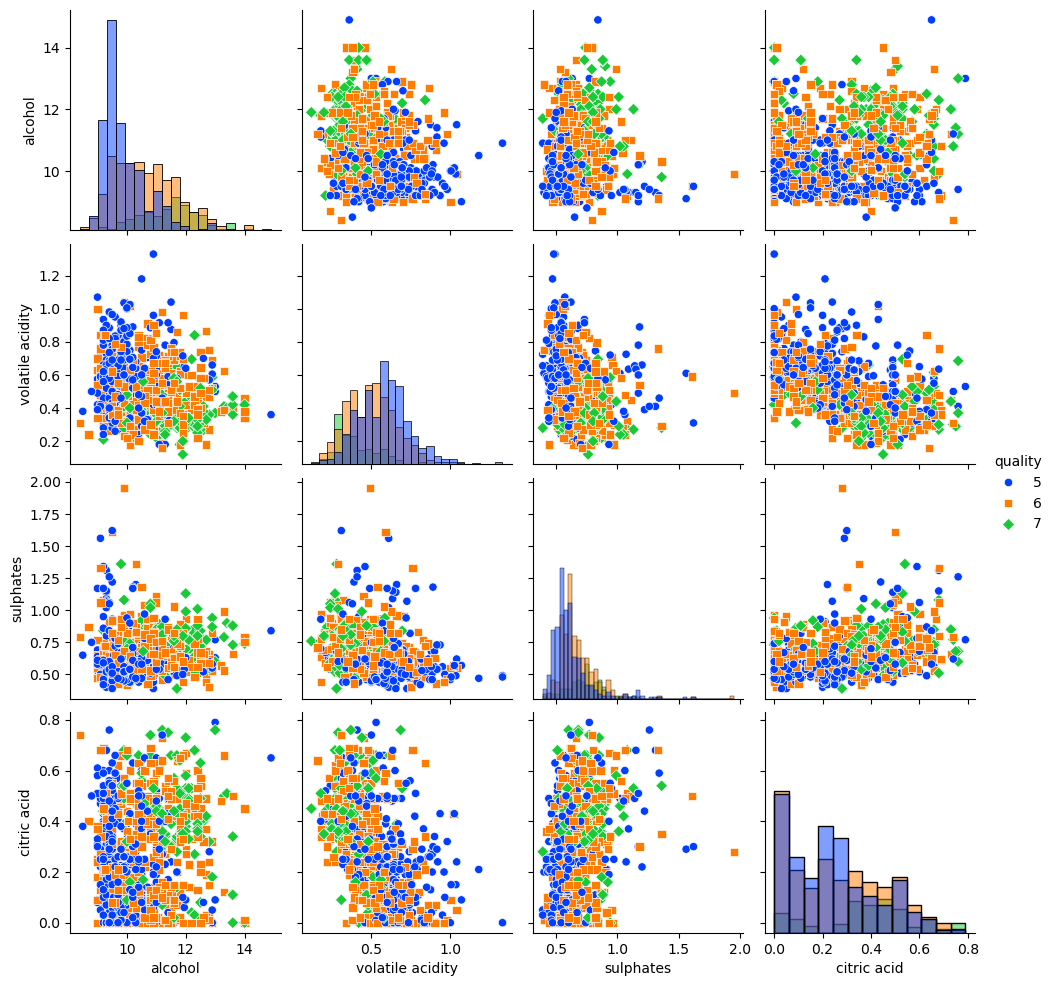

In [7]:
g = sns.pairplot(df_s, hue="quality", diag_kind="hist", markers=["o", "s", "D"], palette="bright")

plt.show()

В табличном варианте оценить степень сопряженности пар признаковпеременных на всем датасете, используя коэффициент корреляции Пирсона. В табличном варианте оценить степень сопряженности пар признаков-переменных в каждом классе датасета, используя коэффициент корреляции Пирсона.

In [8]:
correlation_matrix_all = df_s.corr(method='pearson')

print("Корреляционная матрица на всем датасете:\n")
print(correlation_matrix_all)

classes = df_s['quality'].unique()

correlation_matrices_by_class = {}

for cls in classes:
    subset = df_s[df_s['quality'] == cls]
    correlation_matrix_cls = subset.corr(method='pearson')
    print(f"\nКорреляционная матрица для класса 'quality' = {cls}:\n")
    print(correlation_matrix_cls)

Корреляционная матрица на всем датасете:

                   alcohol  volatile acidity  sulphates  citric acid   quality
alcohol           1.000000         -0.214678   0.102860     0.106822  0.505243
volatile acidity -0.214678          1.000000  -0.270394    -0.536680 -0.366840
sulphates         0.102860         -0.270394   1.000000     0.313093  0.269205
citric acid       0.106822         -0.536680   0.313093     1.000000  0.211306
quality           0.505243         -0.366840   0.269205     0.211306  1.000000

Корреляционная матрица для класса 'quality' = 5:

                   alcohol  volatile acidity  sulphates  citric acid  quality
alcohol           1.000000          0.005399  -0.005672    -0.010480      NaN
volatile acidity  0.005399          1.000000  -0.159522    -0.471936      NaN
sulphates        -0.005672         -0.159522   1.000000     0.327138      NaN
citric acid      -0.010480         -0.471936   0.327138     1.000000      NaN
quality                NaN               Na

Выбрать пару целевых классов и все количественные признаки.
Используя метод LDA (линейный дискриминантный анализ), построить решающую
функцию алгоритма, разграниченные решающей функцией зоны и отдельные
объекты классов на всех парах количественных признаков.

In [9]:
target_classes = [5, 6]
features = df_s.columns.tolist()
features.remove('quality')

# Отфильтровать датасет по выбранным классам
df_filtered = df_s[df_s['quality'].isin(target_classes)]

X = df_filtered[features]
y = df_filtered['quality']
lda = LinearDiscriminantAnalysis()


/home/arina/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


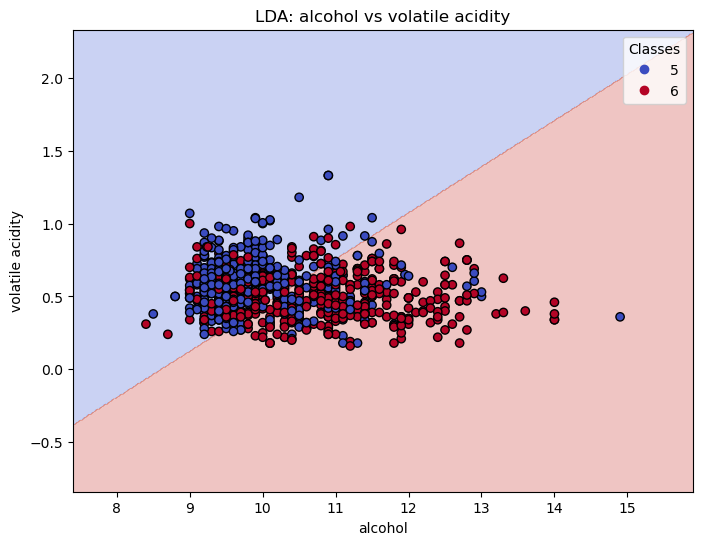

/home/arina/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


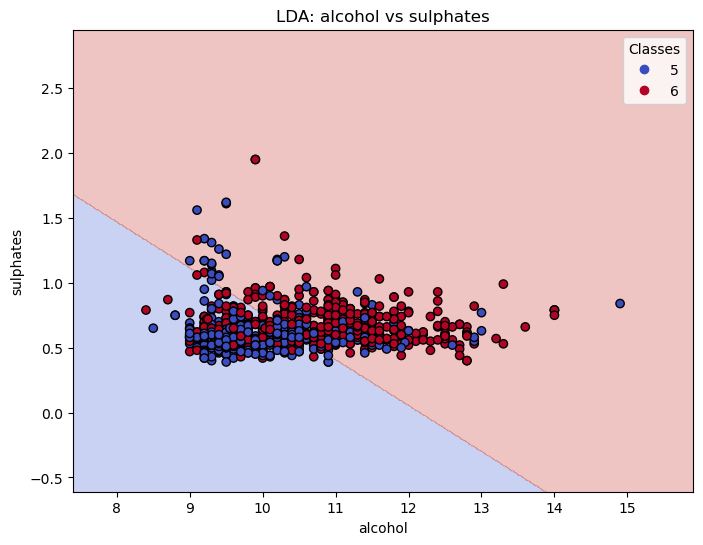

/home/arina/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


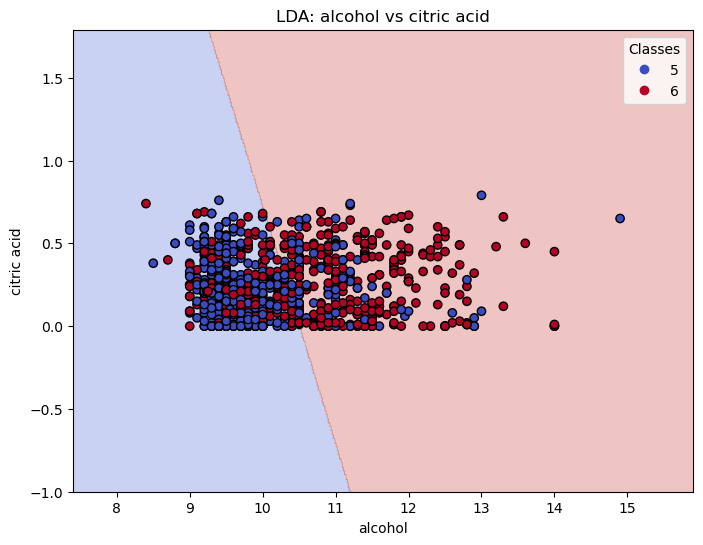

/home/arina/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


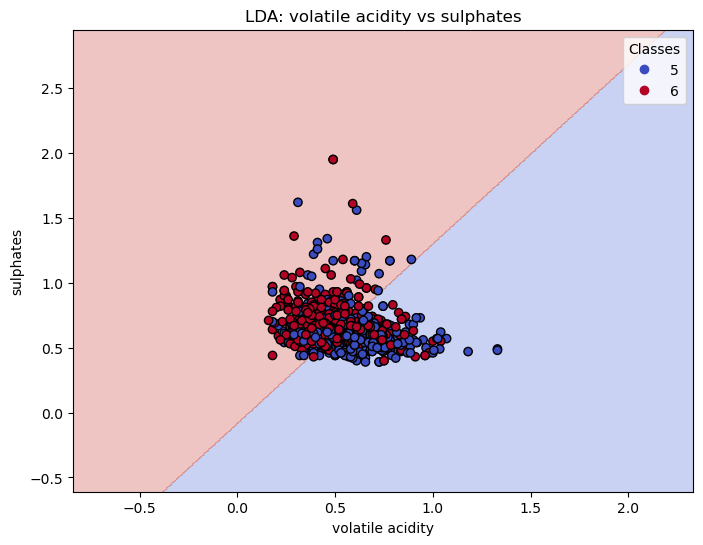

/home/arina/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


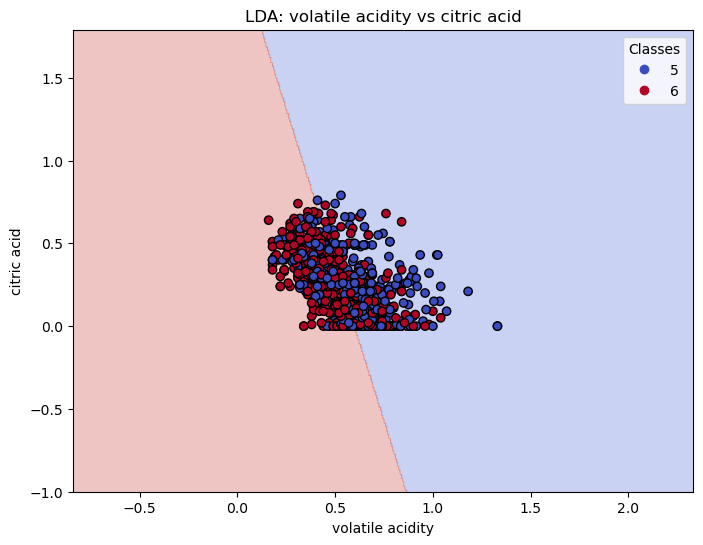

/home/arina/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


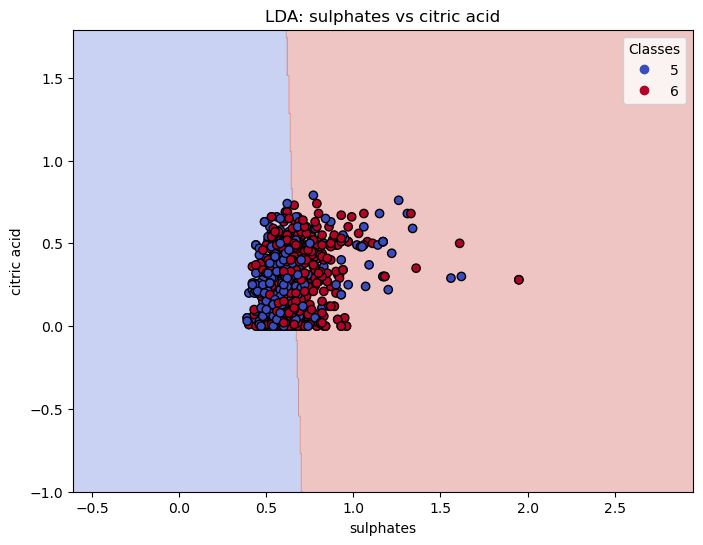

In [10]:
# Все возможные пары количественных признаков
feature_pairs = list(combinations(features, 2))

for feature_1, feature_2 in feature_pairs:
    X_pair = df_filtered[[feature_1, feature_2]]
    lda.fit(X_pair, y)
    
    # Границы для сетки
    x_min, x_max = X_pair[feature_1].min() - 1, X_pair[feature_1].max() + 1
    y_min, y_max = X_pair[feature_2].min() - 1, X_pair[feature_2].max() + 1
    
    # Создание сетки для отображения решающей границы
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
    Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    
    # Отображение цветного фона, соответствующего различным классам
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    
    # Отображение точек классов
    scatter = plt.scatter(X_pair[feature_1], X_pair[feature_2], c=y, cmap=plt.cm.coolwarm, edgecolor='k')

    plt.xlabel(feature_1)
    plt.ylabel(feature_2)
    plt.title(f'LDA: {feature_1} vs {feature_2}')
    plt.legend(*scatter.legend_elements(), title="Classes")
    
    plt.show()


Для одной из пар количественных признаков из пункта [5] на одном рисунке
одновременно построить (а) решающую функцию LDA и (б) линейную регрессию
одного количественного признака от другого.

/home/arina/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


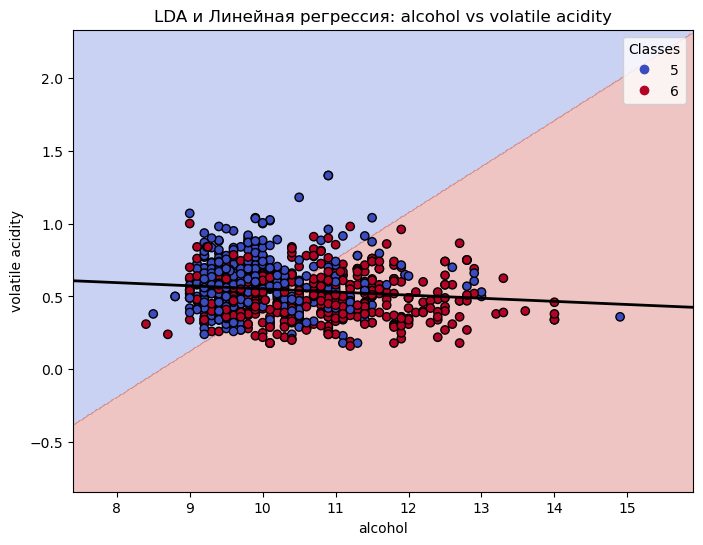

In [11]:
feature_1, feature_2 = features[:2]
X_pair = df_filtered[[feature_1, feature_2]]

# Обучение LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_pair, y)

# Обучение линейной регрессии
regressor = LinearRegression()
regressor.fit(X_pair[[feature_1]], X_pair[feature_2])

# Границы для сетки
x_min, x_max = X_pair[feature_1].min() - 1, X_pair[feature_1].max() + 1
y_min, y_max = X_pair[feature_2].min() - 1, X_pair[feature_2].max() + 1

# Создание сетки для отображения решающей границы
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# Преобразуем сетку в DataFrame с корректными именами признаков
grid = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=[feature_1, feature_2])

# Используем predict для получения предсказаний
Z = lda.predict(grid)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))

# Отображение цветного фона, соответствующего различным классам
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Отображение точек классов
scatter = plt.scatter(X_pair[feature_1], X_pair[feature_2], c=y, cmap=plt.cm.coolwarm, edgecolor='k')

# Линия линейной регрессии
x_range = np.linspace(x_min, x_max, 500)
y_pred = regressor.predict(x_range.reshape(-1, 1))

# Добавляем линию линейной регрессии
plt.plot(x_range, y_pred, color='black', linewidth=2, label='Linear Regression')

plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.title(f'LDA и Линейная регрессия: {feature_1} vs {feature_2}')
plt.legend(*scatter.legend_elements(), title="Classes")

plt.show()


Выбрать два количественных признака и пару целевых классов
На отдельных рисунках с осями количественных признаков построить решающие
функции, разграниченные решающей функцией зоны и отдельные объекты
классов для методов (а) LDA, (б) SVM, (в) логистическая регрессия, (г) наивный
байесовский классификатор

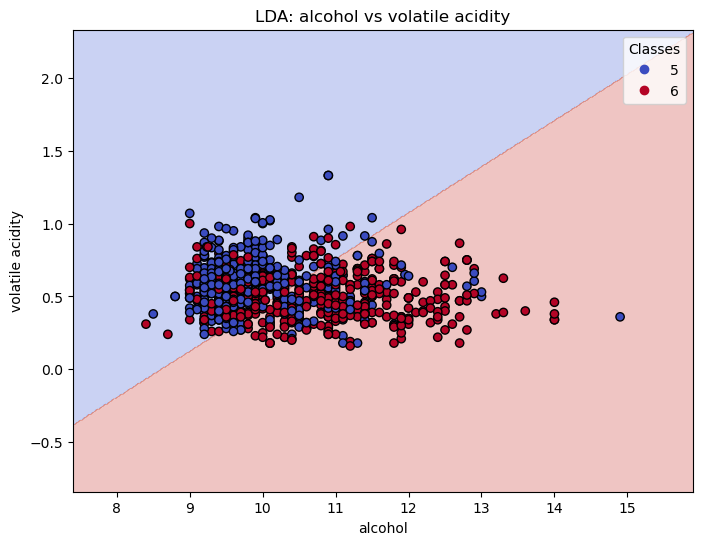

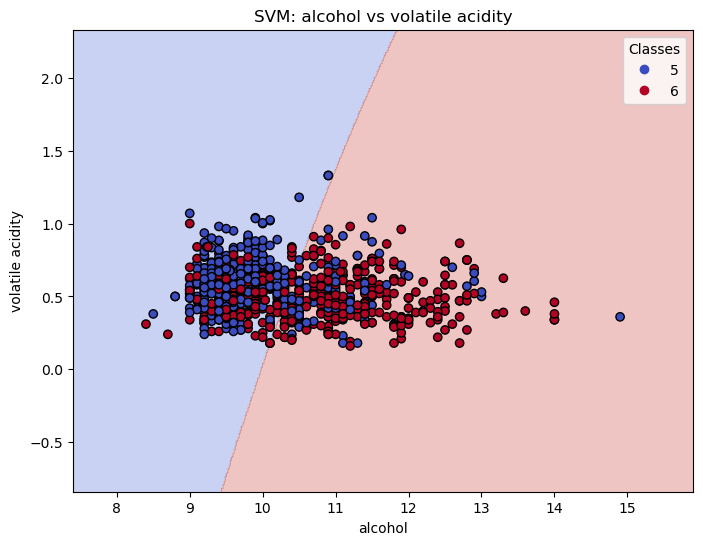

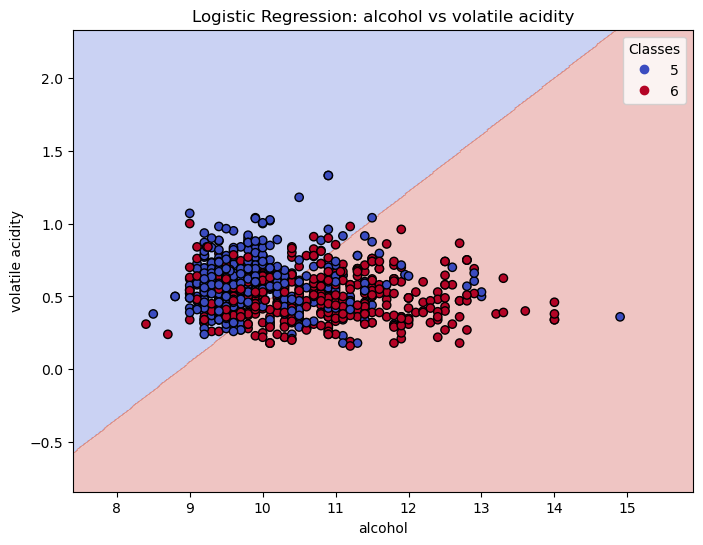

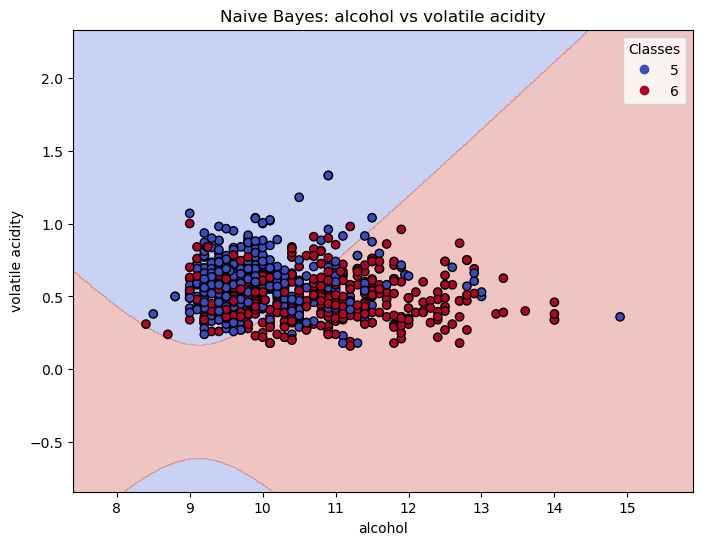

In [12]:
target_classes = [5, 6]
df_filtered = df_s[df_s['quality'].isin(target_classes)]
X = df_filtered[[feature_1, feature_2]]
y = df_filtered['quality']

def plot_decision_boundary(X, y, model, model_name):
    x_min, x_max = X[feature_1].min() - 1, X[feature_1].max() + 1
    y_min, y_max = X[feature_2].min() - 1, X[feature_2].max() + 1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
    grid = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=[feature_1, feature_2])
    
    Z = model.predict(grid).reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    scatter = plt.scatter(X[feature_1], X[feature_2], c=y, cmap=plt.cm.coolwarm, edgecolor='k')
    
    plt.xlabel(feature_1)
    plt.ylabel(feature_2)
    plt.title(f'{model_name}: {feature_1} vs {feature_2}')
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.show()

# (а) LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)
plot_decision_boundary(X, y, lda, 'LDA')

# (б) SVM
svm_model = SVC() 
svm_model.fit(X, y)
plot_decision_boundary(X, y, svm_model, 'SVM')

# (в) Логистическая регрессия
log_reg = LogisticRegression()
log_reg.fit(X, y)
plot_decision_boundary(X, y, log_reg, 'Logistic Regression')

# (г) Наивный Байесовский классификатор
nb = GaussianNB()
nb.fit(X, y)
plot_decision_boundary(X, y, nb, 'Naive Bayes')


Выбрать целевой класс и для каждого метода из пункта [7]:
- Вывести матрицу ошибок.
- Вывести значения sensitivity, specificity, precision, recall.
- Построить ROC кривую и рассчитать метрику AUC.

LDA Confusion Matrix:
[[379 104]
 [187 275]]
Sensitivity: 0.60
Specificity: 0.78
Precision: 0.73
Recall: 0.60


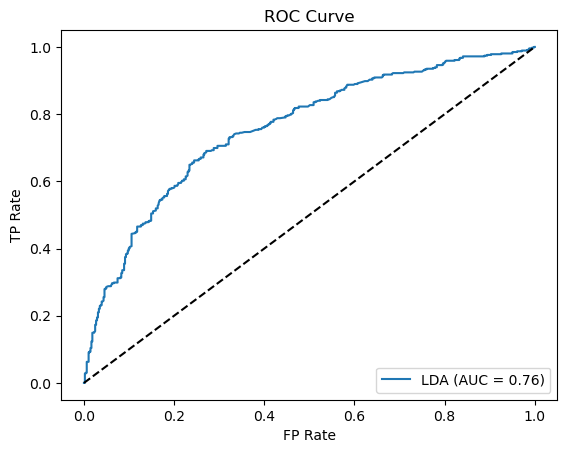

SVM Confusion Matrix:
[[378 105]
 [200 262]]
Sensitivity: 0.57
Specificity: 0.78
Precision: 0.71
Recall: 0.57


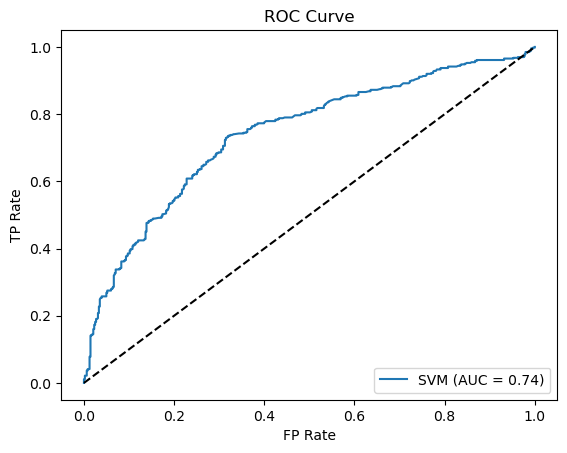

Logistic Regression Confusion Matrix:
[[375 108]
 [182 280]]
Sensitivity: 0.61
Specificity: 0.78
Precision: 0.72
Recall: 0.61


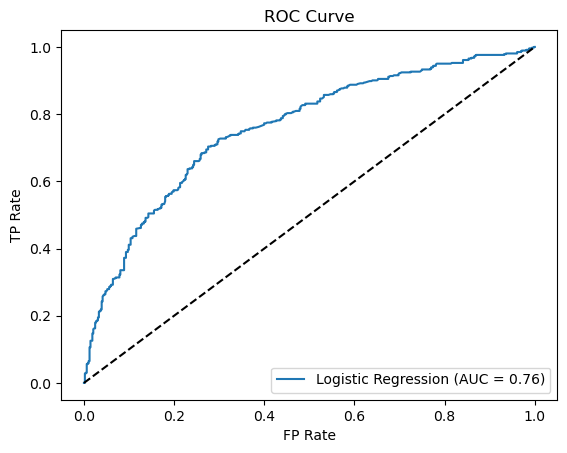

Naive Bayes Confusion Matrix:
[[390  93]
 [203 259]]
Sensitivity: 0.56
Specificity: 0.81
Precision: 0.74
Recall: 0.56


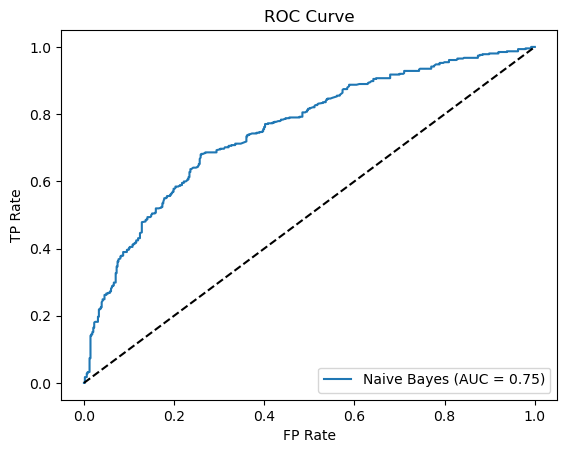

In [13]:
def evaluate_model(model, X, y, model_name):
    # Преобразуем метки 5 и 6 в бинарные значения 0 и 1
    y_binary = np.where(y == 6, 1, 0)  # 6 := 1, 5:= 0 

    y_pred = model.predict(X)

    y_pred_binary = np.where(y_pred == 6, 1, 0)
    
    # Матрица ошибок
    cm = confusion_matrix(y_binary, y_pred_binary)
    tn, fp, fn, tp = cm.ravel()
    
    # Метрики
    sensitivity = tp / (tp + fn)  # Чувствительность (Sensitivity)
    specificity = tn / (tn + fp)  # Специфичность (Specificity)
    precision = tp / (tp + fp)    # Точность (Precision)
    recall = tp / (tp + fn)       # Полнота (Recall)
    

    print(f"{model_name} Confusion Matrix:")
    print(cm)
    print(f"Sensitivity: {sensitivity:.2f}")
    print(f"Specificity: {specificity:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    
    # ROC и AUC для моделей, которые могут предсказывать вероятности
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X)[:, 1]  # Вероятности для класса 1 (6)
    else:
        # Для SVM используем decision_function, если нет вероятностей
        y_prob = model.decision_function(X)
    
    fpr, tpr, _ = roc_curve(y_binary, y_prob, pos_label=1)  # Указываем pos_label=1 для класса 6
    auc = roc_auc_score(y_binary, y_prob)
    

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('FP Rate')
    plt.ylabel('TP Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()


evaluate_model(lda, X, y, 'LDA')  
evaluate_model(svm_model, X, y, 'SVM')  
evaluate_model(log_reg, X, y, 'Logistic Regression')
evaluate_model(nb, X, y, 'Naive Bayes') 
